# House Price Prediction: Advanced Regression
By:  Simranjeet Singh (sjsingh1809@gmail.com)

## Importing Libraries

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [209]:
# to see all the columns and rows if needed
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Reading the data

In [210]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Performing basic checks on data set

In [211]:
df.shape

(1460, 81)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [213]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [214]:
#Percentage of null values in each columns
(df.isnull().sum()/df.shape[0])*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

## Performing EDA

In [215]:
def calc_null(df):
    return round((df.isnull().sum()/df.shape[0])*100,3)

###  1. Dropping the columns having more than 45% of missing values

In [216]:
calc_null(df)

Id                0.000
MSSubClass        0.000
MSZoning          0.000
LotFrontage      17.740
LotArea           0.000
Street            0.000
Alley            93.767
LotShape          0.000
LandContour       0.000
Utilities         0.000
LotConfig         0.000
LandSlope         0.000
Neighborhood      0.000
Condition1        0.000
Condition2        0.000
BldgType          0.000
HouseStyle        0.000
OverallQual       0.000
OverallCond       0.000
YearBuilt         0.000
YearRemodAdd      0.000
RoofStyle         0.000
RoofMatl          0.000
Exterior1st       0.000
Exterior2nd       0.000
MasVnrType        0.548
MasVnrArea        0.548
ExterQual         0.000
ExterCond         0.000
Foundation        0.000
BsmtQual          2.534
BsmtCond          2.534
BsmtExposure      2.603
BsmtFinType1      2.534
BsmtFinSF1        0.000
BsmtFinType2      2.603
BsmtFinSF2        0.000
BsmtUnfSF         0.000
TotalBsmtSF       0.000
Heating           0.000
HeatingQC         0.000
CentralAir      

In [217]:
df = df.loc[:,~(df.isnull().sum()/df.shape[0]>0.45)]

In [218]:
df.shape

(1460, 76)

In [219]:
# Dropping unique columns as well
df=df.drop('Id',axis=1)

In [220]:
# Handling years column
#df['Age']=2020-df.GarageYrBlt
#df=df.drop('GarageYrBlt',axis=1)

In [221]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


#### 2. Checking the NA values in each column and treating it accordingly

In [222]:
calc_null(df)

MSSubClass        0.000
MSZoning          0.000
LotFrontage      17.740
LotArea           0.000
Street            0.000
LotShape          0.000
LandContour       0.000
Utilities         0.000
LotConfig         0.000
LandSlope         0.000
Neighborhood      0.000
Condition1        0.000
Condition2        0.000
BldgType          0.000
HouseStyle        0.000
OverallQual       0.000
OverallCond       0.000
YearBuilt         0.000
YearRemodAdd      0.000
RoofStyle         0.000
RoofMatl          0.000
Exterior1st       0.000
Exterior2nd       0.000
MasVnrType        0.548
MasVnrArea        0.548
ExterQual         0.000
ExterCond         0.000
Foundation        0.000
BsmtQual          2.534
BsmtCond          2.534
BsmtExposure      2.603
BsmtFinType1      2.534
BsmtFinSF1        0.000
BsmtFinType2      2.603
BsmtFinSF2        0.000
BsmtUnfSF         0.000
TotalBsmtSF       0.000
Heating           0.000
HeatingQC         0.000
CentralAir        0.000
Electrical        0.068
1stFlrSF        

In [223]:
#Checking LotFrontage featrure
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [224]:
# Replacing the NaN value with mean for LotFrontage feature 
df.LotFrontage.fillna((df.LotFrontage.mean()), inplace = True)

In [225]:
# Checking BsmtQual
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [226]:
# Replacing the NA with No Basement for features BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
df.BsmtQual.fillna("No Basement", inplace = True)
df.BsmtCond.fillna("No Basement", inplace = True)
df.BsmtExposure.fillna("No Basement", inplace = True)
df.BsmtFinType1.fillna("No Basement", inplace = True)
df.BsmtFinType2.fillna("No Basement", inplace = True)

In [227]:
# Dropping the records which are having NA for features 'MasVnrType', 'MasVnrArea', 'Electrical'
df = df[pd.notnull(df['MasVnrType'])]
df = df[pd.notnull(df['MasVnrArea'])]
df = df[pd.notnull(df['Electrical'])]

In [228]:
# Replacing the NA with No Garage for features GarageType, GarageFinish, GarageQual, GarageCond
df.GarageType.fillna("No Garage", inplace = True)
df.GarageFinish.fillna("No Garage", inplace = True)
df.GarageQual.fillna("No Garage", inplace = True)
df.GarageCond.fillna("No Garage", inplace = True)

In [229]:
# Replacing the NA value with mean for LotFrontage feature 
df.GarageYrBlt.fillna((df.GarageYrBlt.mean()), inplace = True)

In [230]:
# Replacing the NA value with mean for Age feature 
#df.Age.fillna((df.Age.mean()), inplace = True)

In [231]:
calc_null(df)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

#### 3. Checking the continues variables

In [232]:
# Continues(numerical) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [233]:
# From Data dictionary we see that there are few variables which are treated as numerical variables 
# but we can treat them as categorical variables. So we are droping those columns from df_numeric DataFrame
# dropping the columns we want to treat as categorical variables
df_numeric = df_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','BsmtFullBath',
                              'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd',
                              'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold'], axis=1)
df_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


In [234]:
numerical_col=df_numeric.columns
numerical_col

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

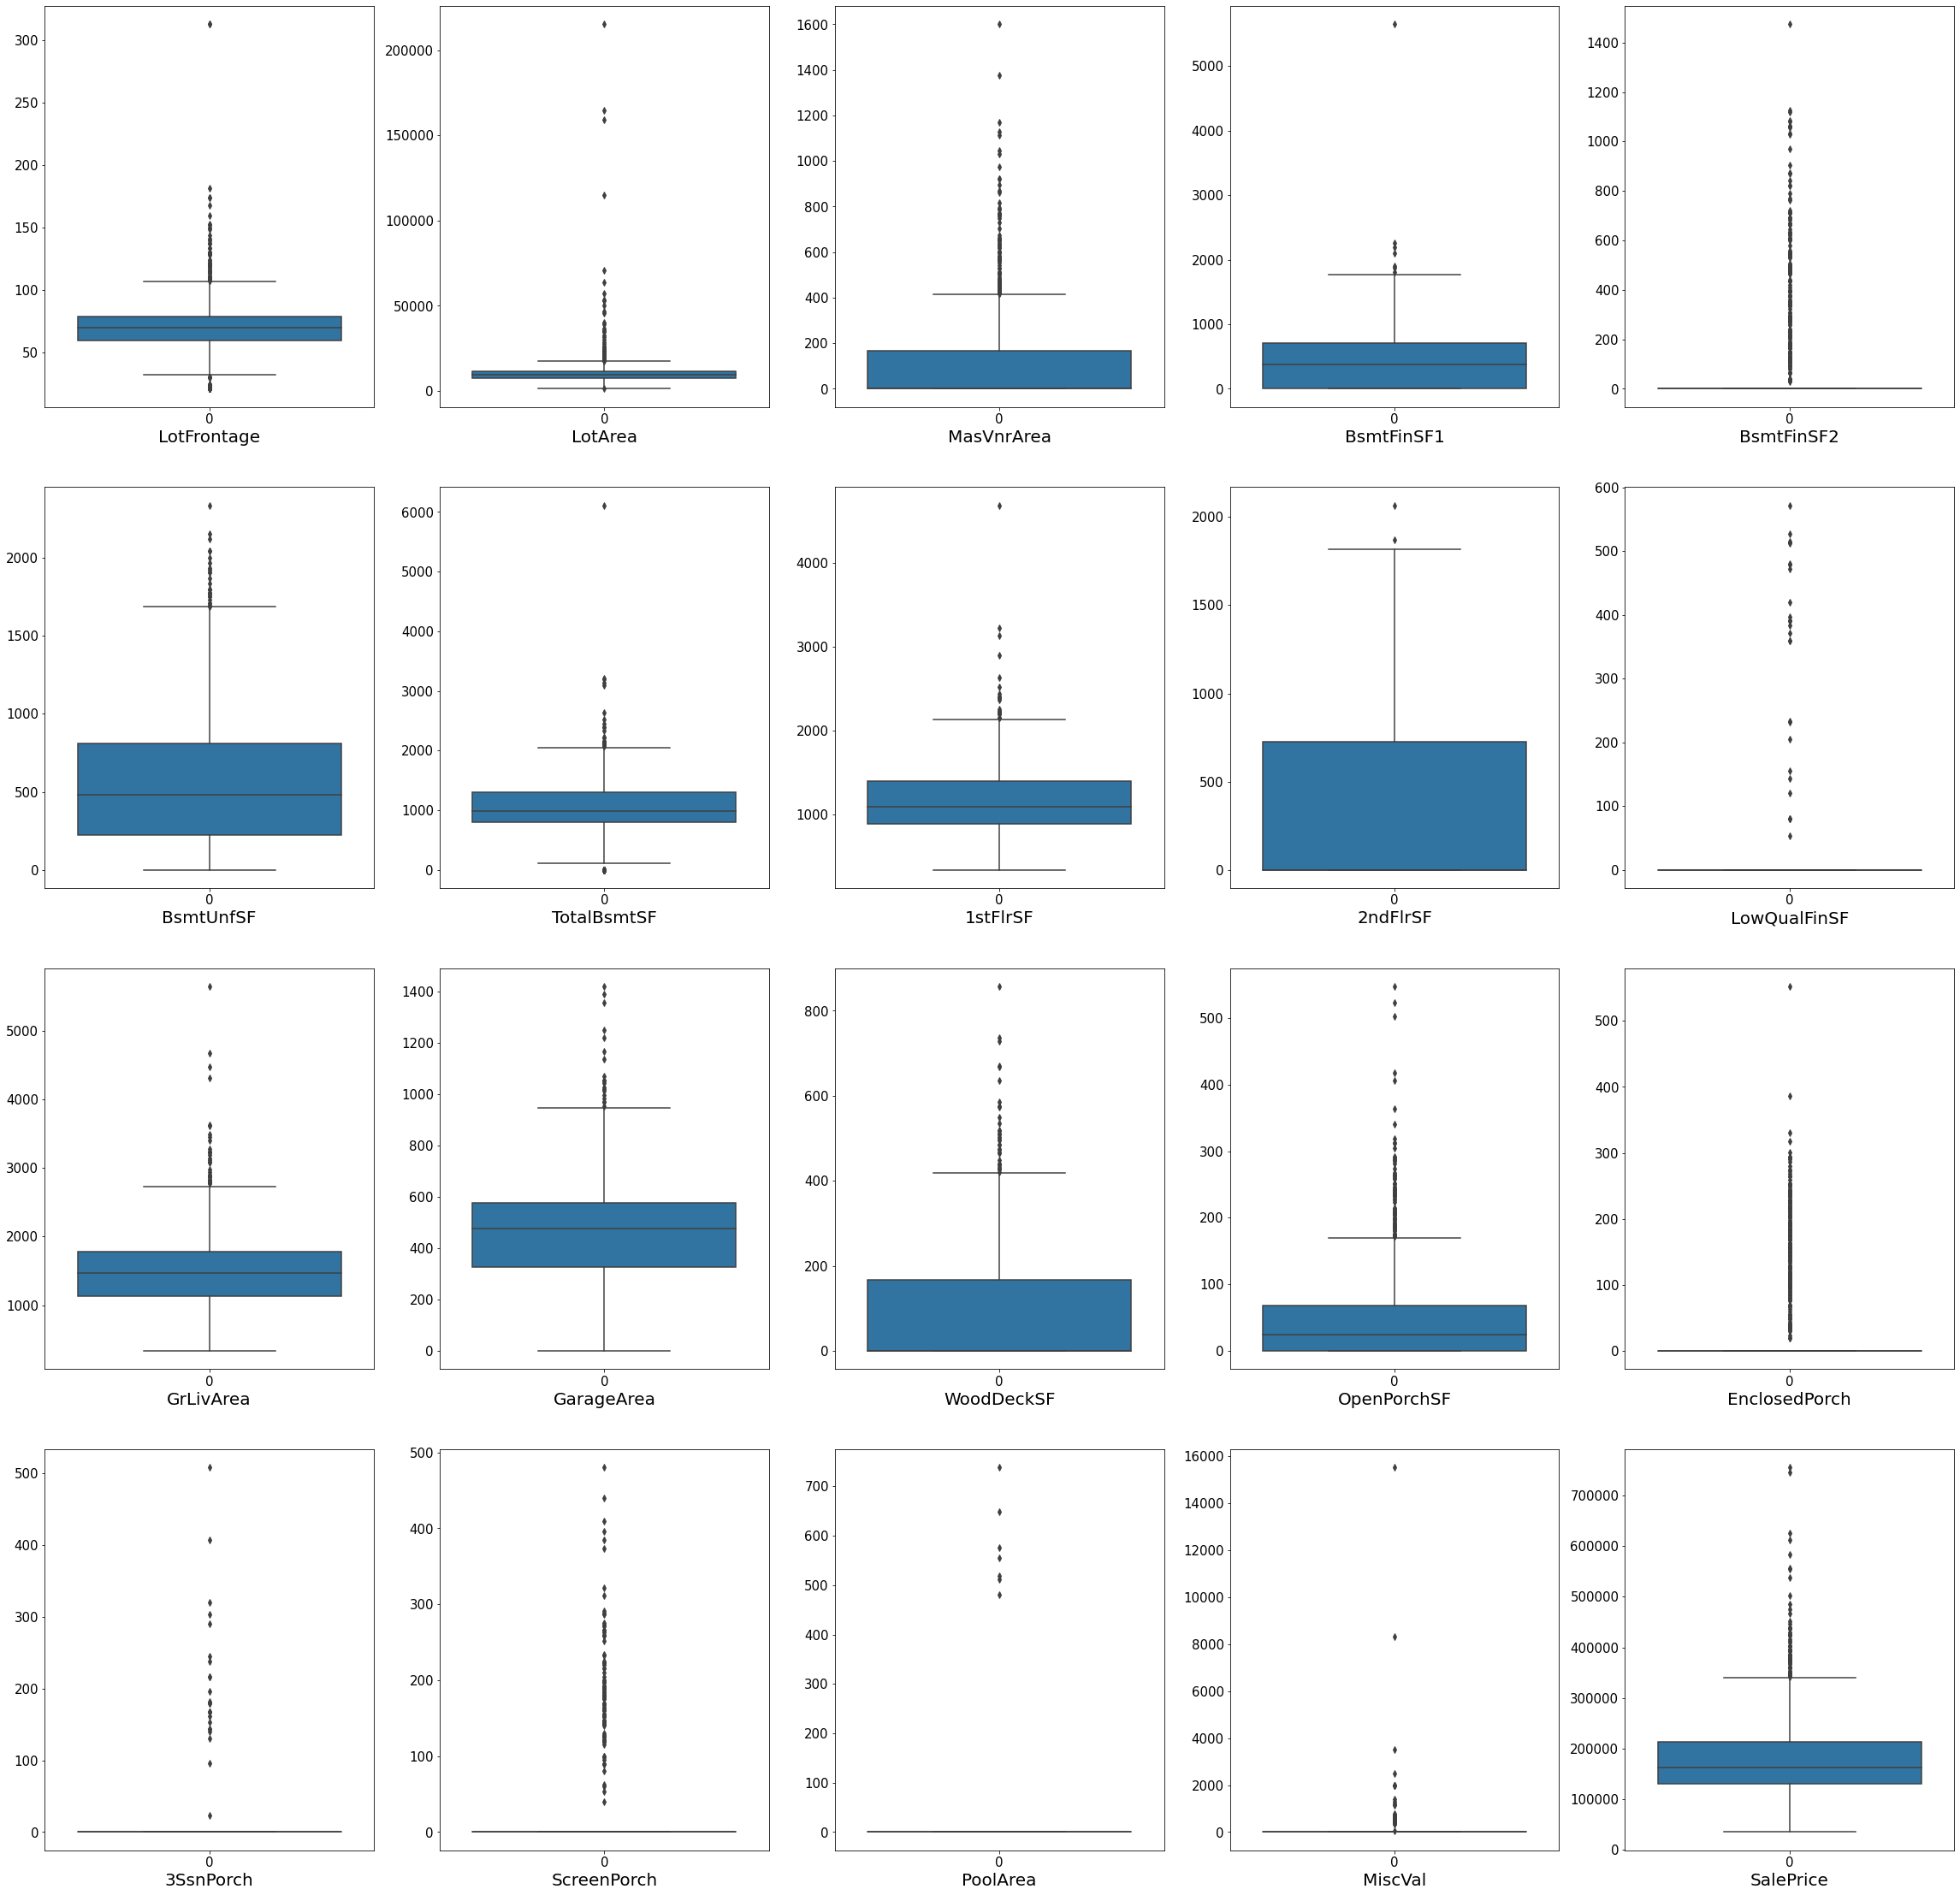

In [235]:
plt.figure(figsize=(40,50))
for i in range(len(numerical_col)):
    plt.subplot(5,5,i+1)
    sns.boxplot(data = df[numerical_col[i]])
    plt.xlabel(numerical_col[i],fontdict={'fontsize':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.show()

__So, we can see that there are outliers in out dataset.__

### Outlier Treatment

In [236]:
for i in range(len(numerical_col)):
    Q1=df[numerical_col[i]].quantile(0.0)
    Q3=df[numerical_col[i]].quantile(0.90)
    IQR=Q3-Q1
    df=df[(df[numerical_col[i]] >= Q1 - 1.5*IQR) & 
                          (df[numerical_col[i]] <= Q3 + 1.5*IQR)]

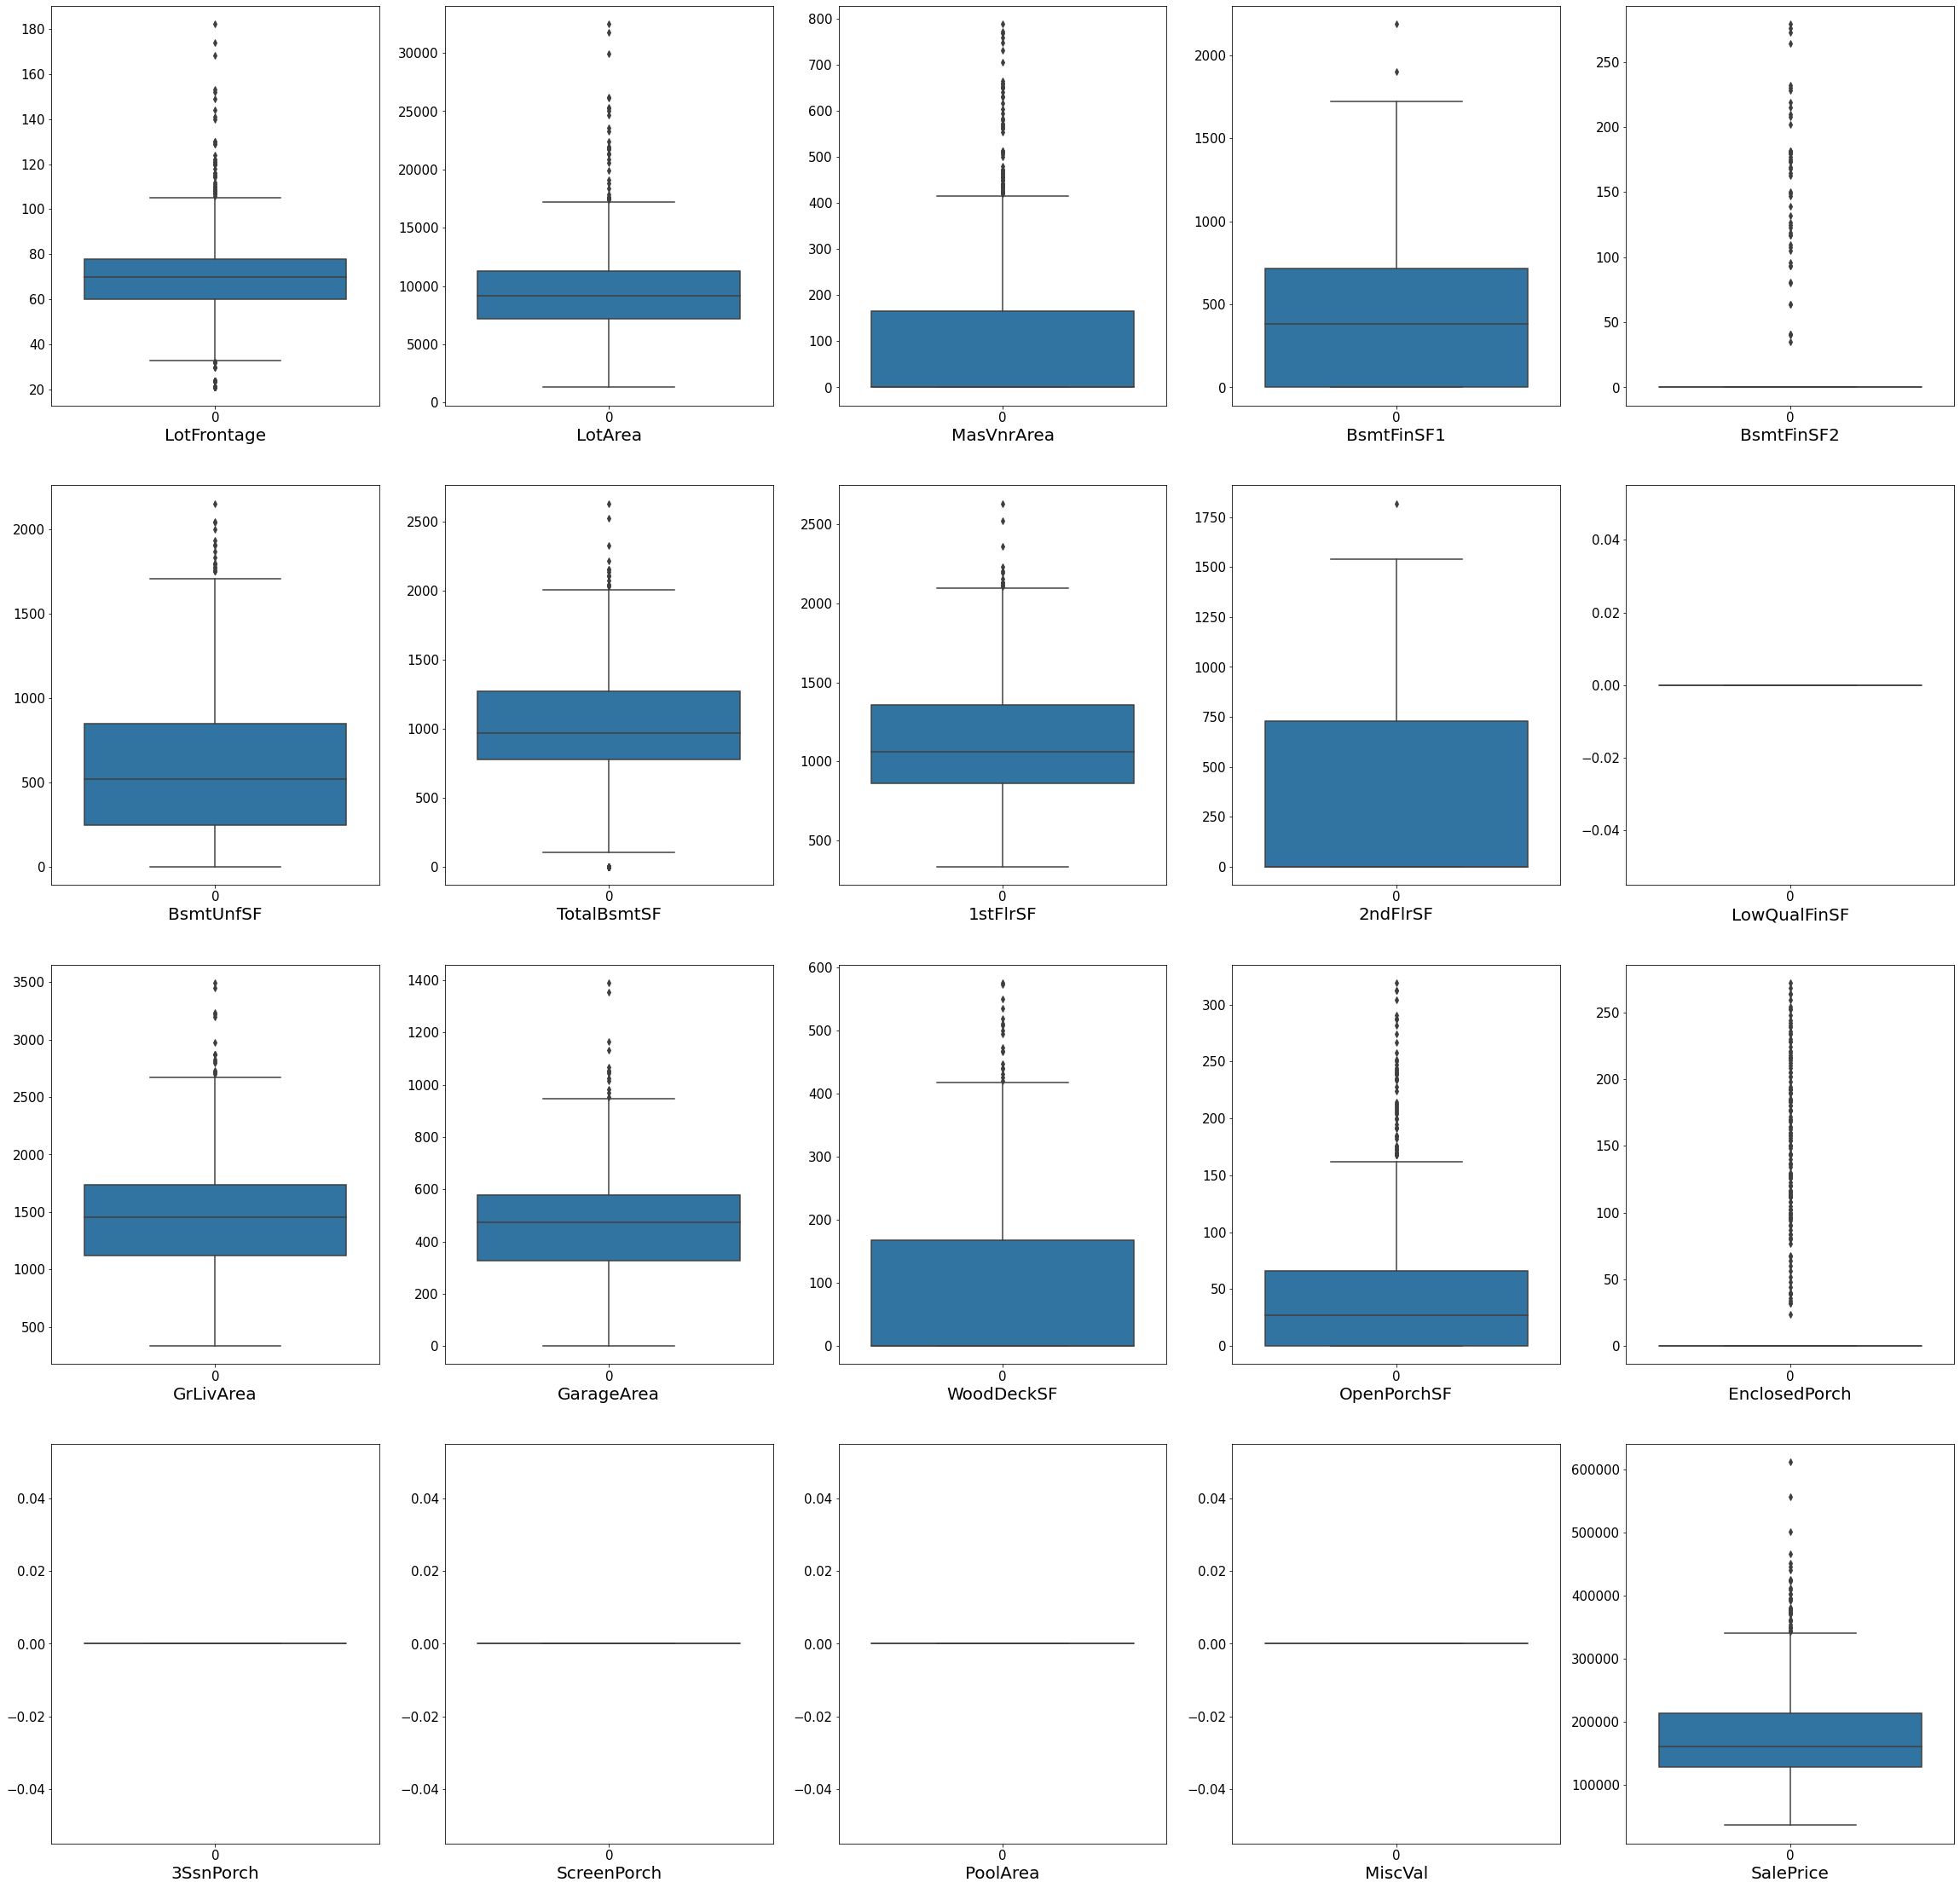

In [237]:
plt.figure(figsize=(40,50))
for i in range(len(numerical_col)):
    plt.subplot(5,5,i+1)
    sns.boxplot(data = df[numerical_col[i]])
    plt.xlabel(numerical_col[i],fontdict={'fontsize':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.show()

Observation: All Values for these 'LowQualFinSF','3SsnPorch','PoolArea','MiscVal' 4 variables are 0. So, will drop all these columns

In [238]:
df=df.drop(['LowQualFinSF','3SsnPorch','PoolArea','MiscVal'],axis=1)
df_numeric=df_numeric.drop(['LowQualFinSF','3SsnPorch','PoolArea','MiscVal'],axis=1)

In [239]:
numerical_col=df_numeric.columns
numerical_col

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'SalePrice'],
      dtype='object')

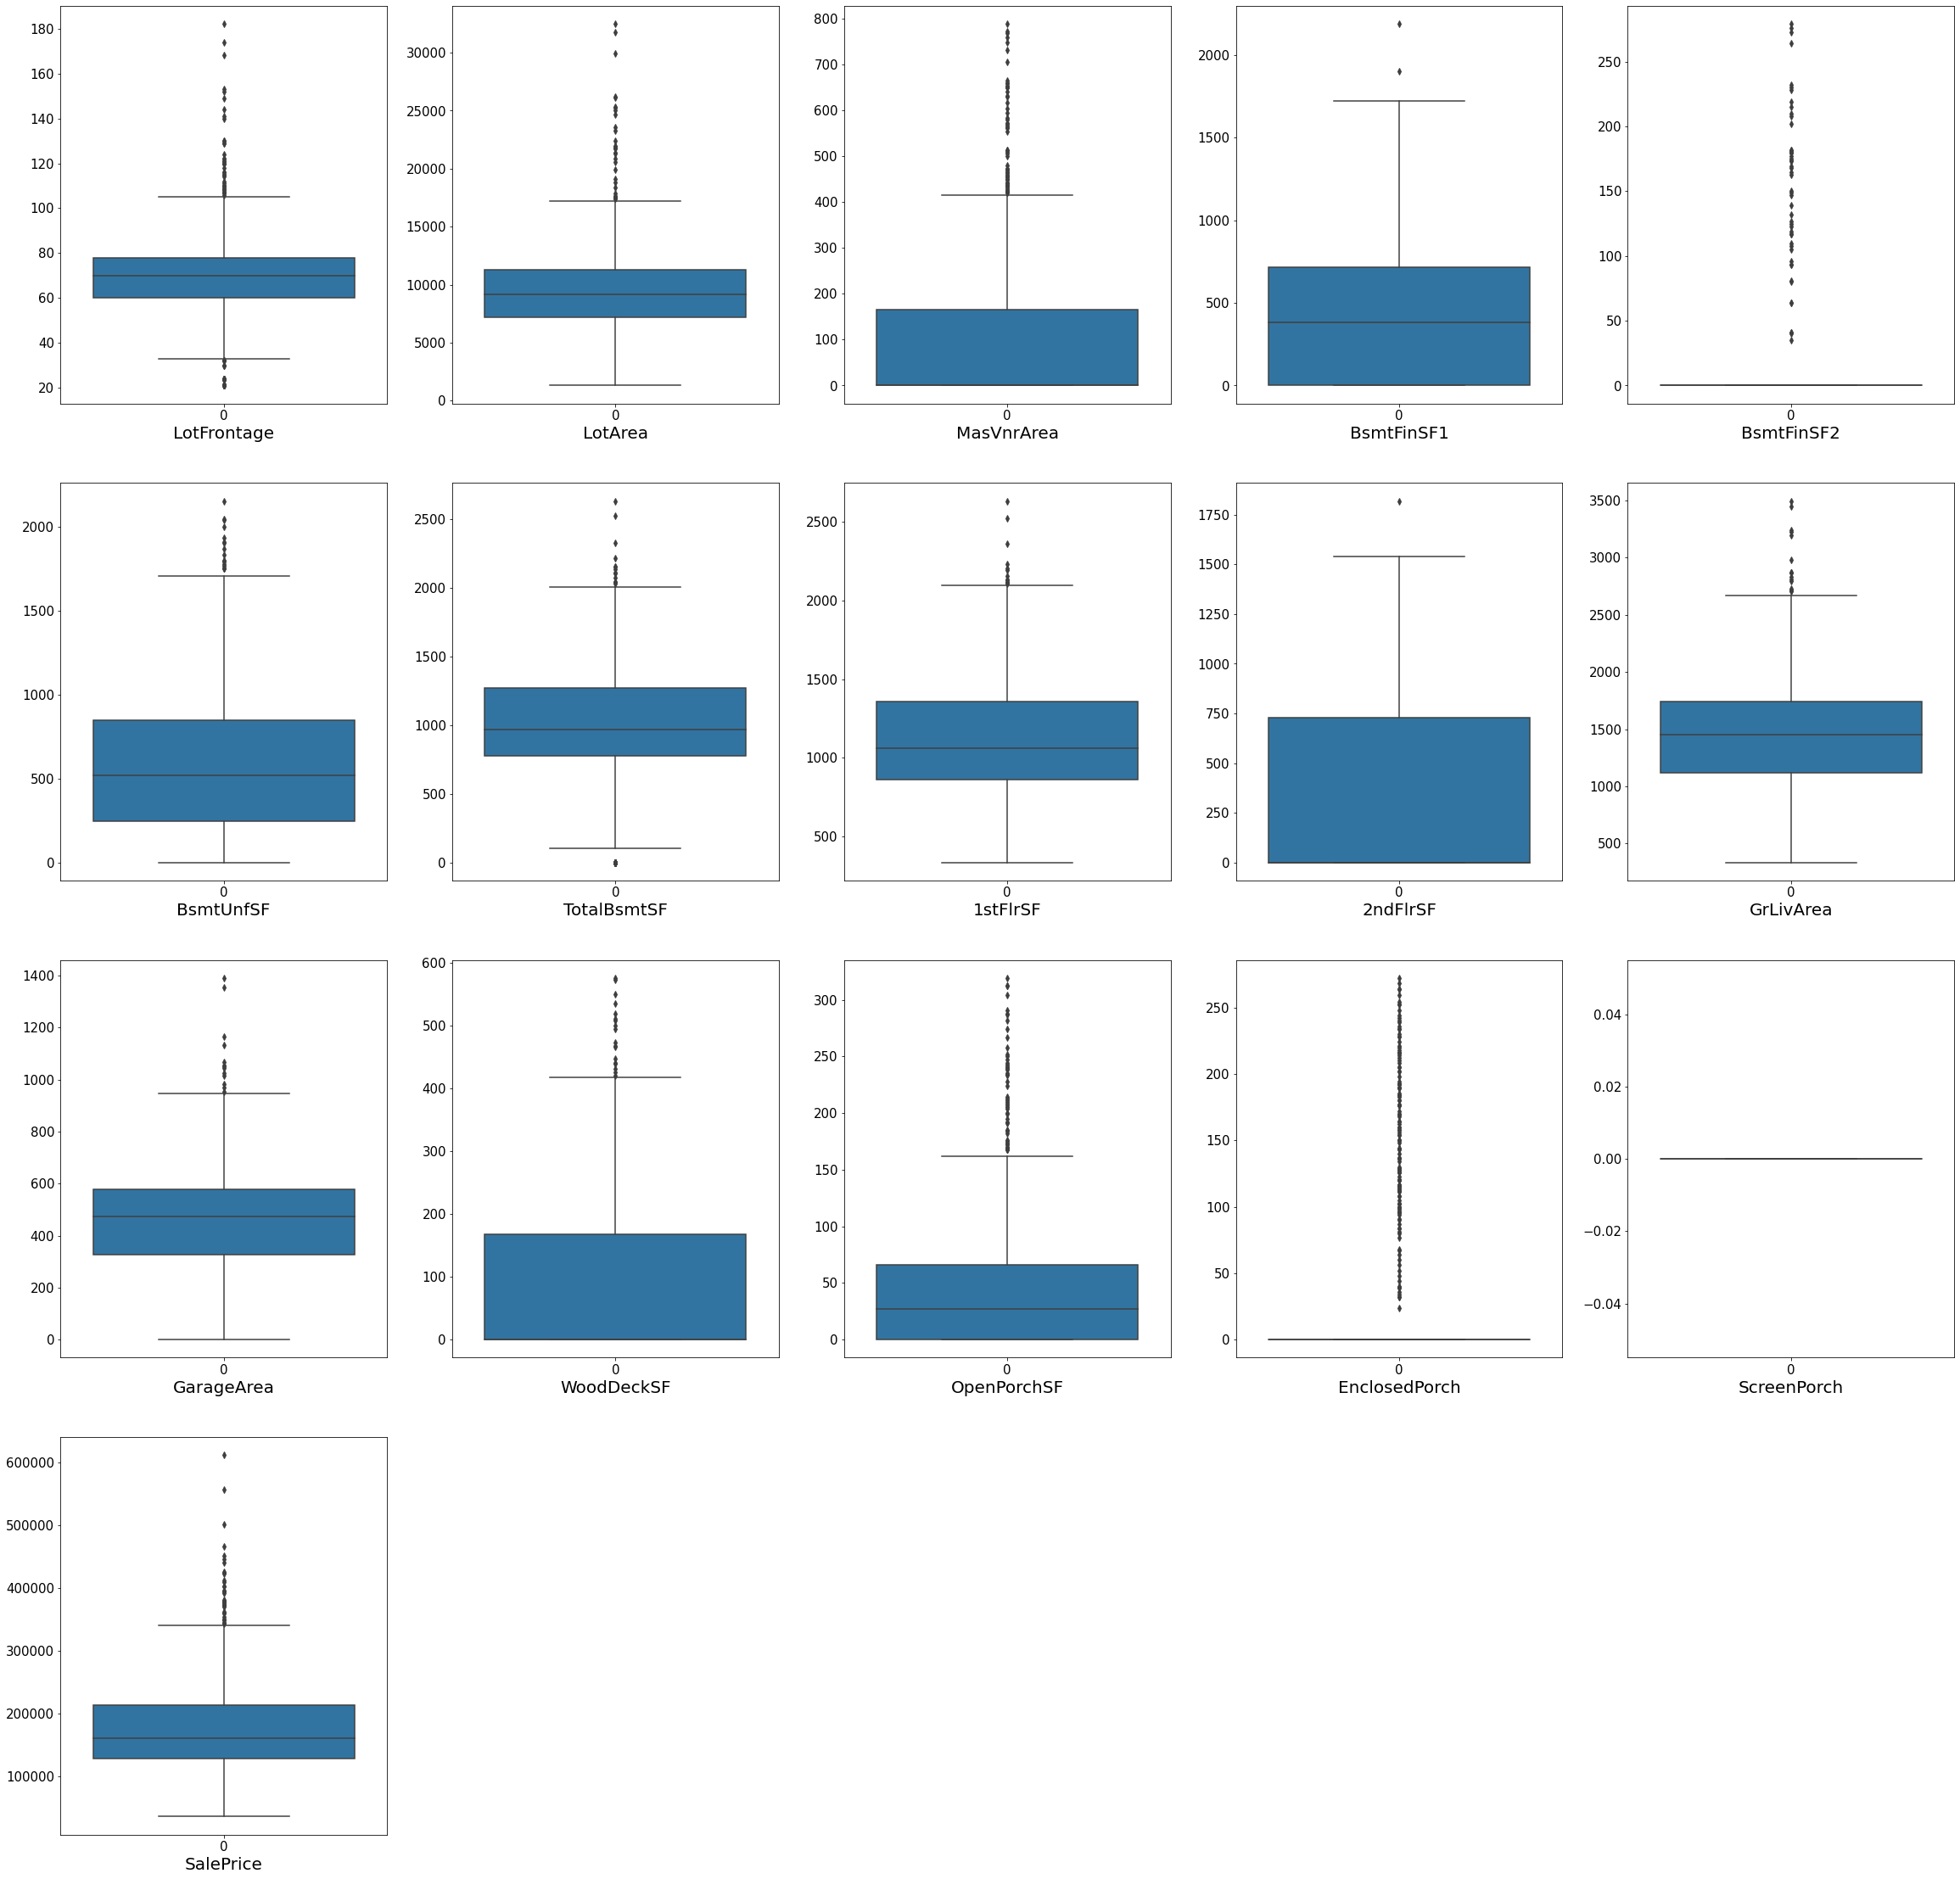

In [240]:
plt.figure(figsize=(40,50))
for i in range(len(numerical_col)):
    plt.subplot(5,5,i+1)
    sns.boxplot(data = df[numerical_col[i]])
    plt.xlabel(numerical_col[i],fontdict={'fontsize':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.show()

### Correlation

In [241]:
# Checking the correlation between numerical variables
corr = df_numeric.corr()
corr

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
LotFrontage,1.000000,0.306918,0.179774,0.217204,0.043693,0.119975,0.363155,0.415154,0.073401,0.368349,0.323352,0.076028,0.135262,0.010145,0.038007,0.333343
LotArea,0.306918,1.000000,0.104141,0.213081,0.111674,-0.004250,0.258538,0.295977,0.052979,0.261152,0.180767,0.173170,0.086278,-0.023114,0.043498,0.264668
MasVnrArea,0.179774,0.104141,1.000000,0.264469,-0.072443,0.114298,0.363667,0.344255,0.174874,0.390818,0.372990,0.159754,0.125461,-0.110363,0.061367,0.477486
BsmtFinSF1,0.217204,0.213081,0.264469,1.000000,-0.049498,-0.496605,0.520098,0.442838,-0.135330,0.205944,0.295374,0.205447,0.107279,-0.105887,0.063139,0.383995
BsmtFinSF2,0.043693,0.111674,-0.072443,-0.049498,1.000000,-0.209806,0.106092,0.098654,-0.099445,-0.008956,-0.017641,0.067684,0.004155,0.036680,0.088430,-0.010350
BsmtUnfSF,0.119975,-0.004250,0.114298,-0.496605,-0.209806,1.000000,0.415900,0.318053,0.006341,0.240770,0.183865,-0.004180,0.130046,-0.003787,-0.012585,0.215707
TotalBsmtSF,0.363155,0.258538,0.363667,0.520098,0.106092,0.415900,1.000000,0.818107,-0.171058,0.453975,0.486298,0.234420,0.244411,-0.100381,0.085616,0.613299
1stFlrSF,0.415154,0.295977,0.344255,0.442838,0.098654,0.318053,0.818107,1.000000,-0.198812,0.565895,0.490839,0.238824,0.210229,-0.072904,0.090177,0.606969
2ndFlrSF,0.073401,0.052979,0.174874,-0.135330,-0.099445,0.006341,-0.171058,-0.198812,1.000000,0.690403,0.140046,0.090956,0.210906,0.064396,0.040904,0.322840
GrLivArea,0.368349,0.261152,0.390818,0.205944,-0.008956,0.240770,0.453975,0.565895,0.690403,1.000000,0.469396,0.247992,0.330746,0.005757,0.102451,0.710073


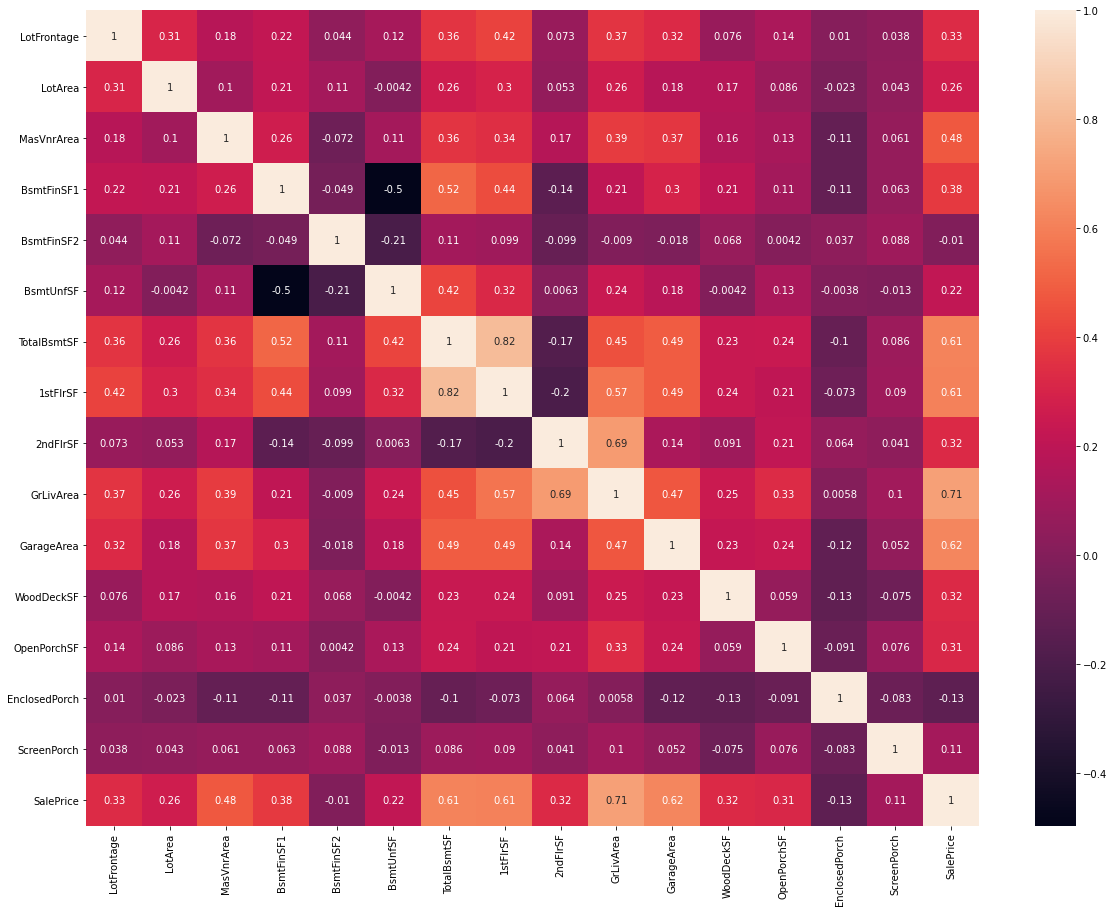

In [242]:
# Plotting the Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)
plt.show()

In [243]:
numerical_col=df_numeric.columns
numerical_col

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'SalePrice'],
      dtype='object')

#### 4. Checking the categorical variables

In [244]:
# Converting numerical ciolumns to categorical columns
df.MSSubClass = df.MSSubClass.astype('object')
df.OverallQual = df.OverallQual.astype('object')
df.OverallCond = df.OverallCond.astype('object')
df.BsmtFullBath = df.BsmtFullBath.astype('object')
df.BsmtHalfBath = df.BsmtHalfBath.astype('object')
df.FullBath = df.FullBath.astype('object')
df.HalfBath = df.HalfBath.astype('object')
df.BedroomAbvGr = df.BedroomAbvGr.astype('object')
df.KitchenAbvGr = df.KitchenAbvGr.astype('object')
df.TotRmsAbvGrd = df.TotRmsAbvGrd.astype('object')
df.Fireplaces = df.Fireplaces.astype('object')
df.GarageCars = df.GarageCars.astype('object')

In [245]:
# Categorical variables in the dataset
df_cat = df.select_dtypes(include=['object'])
df_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [246]:
for col in df_cat.columns:
    print()
    print("**************** ",col," ****************")
    print(round((df[col].value_counts()/df.shape[0])*100,2))


****************  MSSubClass  ****************
20     35.77
60     21.14
50      9.19
120     6.33
30      5.08
160     4.91
90      4.19
70      4.19
80      3.12
190     2.05
85      1.52
45      1.07
180     0.71
75      0.54
40      0.18
Name: MSSubClass, dtype: float64

****************  MSZoning  ****************
RL         77.34
RM         16.06
FV          4.91
RH          1.25
C (all)     0.45
Name: MSZoning, dtype: float64

****************  Street  ****************
Pave    99.91
Grvl     0.09
Name: Street, dtype: float64

****************  LotShape  ****************
Reg    65.57
IR1    32.02
IR2     1.78
IR3     0.62
Name: LotShape, dtype: float64

****************  LandContour  ****************
Lvl    91.26
Bnk     3.84
HLS     3.39
Low     1.52
Name: LandContour, dtype: float64

****************  Utilities  ****************
AllPub    100.0
Name: Utilities, dtype: float64

****************  LotConfig  ****************
Inside     72.61
Corner     17.57
CulDSac     5.89
FR2 

__Observation:__ 
- Street, Utilities, Condition2, RoofMatl, Hea?ting columns has approx. 98% or more records containing same values. So, will drop those columns.
- LandSlope, BsmtHalfBath, KitchenAbvGr contain same value for approx 95% records.

In [247]:
# Dropping Street, Utilities, Condition2, RoofMatl, Heating
df = df.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating','LandSlope','BsmtHalfBath','KitchenAbvGr'], axis=1)
df.shape

(1121, 63)

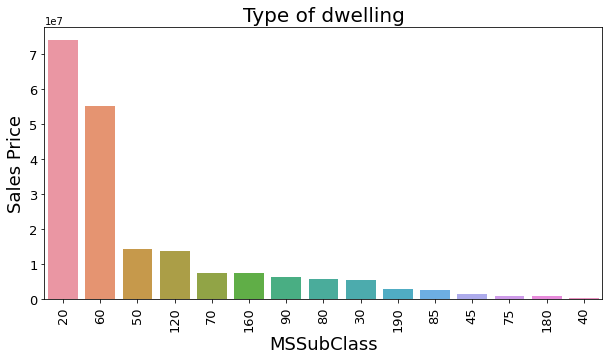

In [248]:
colName = 'MSSubClass'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('MSSubClass',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('Type of dwelling',fontsize=20)
plt.show()

In [249]:
# Checking MSZoning columns
frq = df.MSZoning.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<5).dropna()
frq
df.MSZoning = df.MSZoning.replace(frq.index,'Others')  
df.MSZoning.value_counts()/df.shape[0]*100

RL        77.341659
RM        16.057092
Others     6.601249
Name: MSZoning, dtype: float64

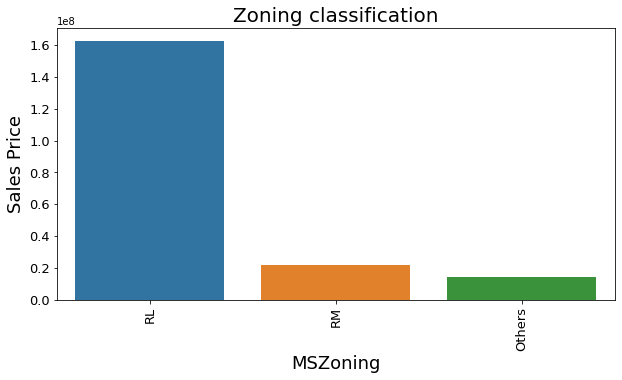

In [250]:
colName = 'MSZoning'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('MSZoning',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('Zoning classification',fontsize=20)
plt.show()

In [251]:
# Checking LotShape columns
frq = df.LotShape.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<5).dropna()
frq
df.LotShape = df.LotShape.replace(frq.index,'Others')  
df.LotShape.value_counts()/df.shape[0]*100

Reg       65.566459
IR1       32.024978
Others     2.408564
Name: LotShape, dtype: float64

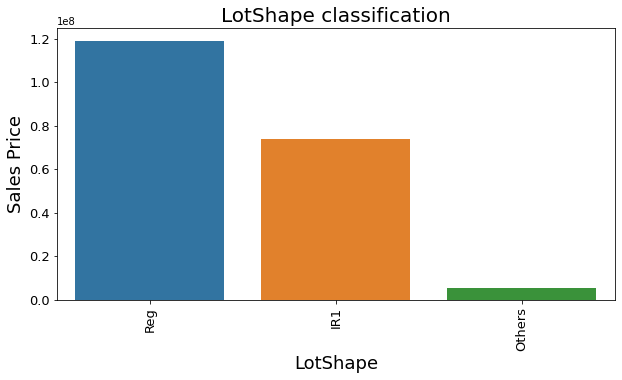

In [252]:
colName = 'LotShape'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('LotShape',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('LotShape classification',fontsize=20)
plt.show()

In [253]:
# Checking LotConfig columns
frq = df.LotConfig.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<10).dropna()
frq
df.LotConfig = df.LotConfig.replace(frq.index,'Others')  
df.LotConfig.value_counts()/df.shape[0]*100

Inside    72.613738
Corner    17.573595
Others     9.812667
Name: LotConfig, dtype: float64

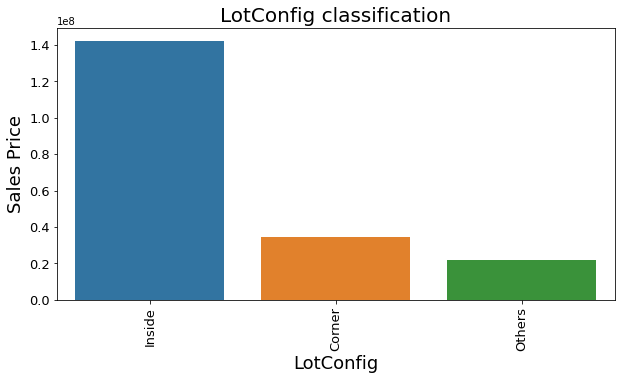

In [254]:
colName = 'LotConfig'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('LotConfig',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('LotConfig classification',fontsize=20)
plt.show()

In [255]:
# Checking Condition1 columns
frq = df.Condition1.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<1).dropna()
frq
df.Condition1 = df.Condition1.replace(frq.index,'Others')  
df.Condition1.value_counts()/df.shape[0]*100

Norm      87.065120
Feedr      5.173952
Artery     3.300624
Others     1.694915
RRAn       1.694915
PosN       1.070473
Name: Condition1, dtype: float64

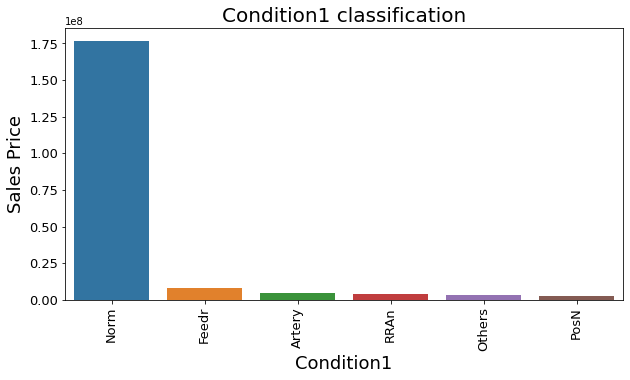

In [256]:
colName = 'Condition1'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Condition1',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('Condition1 classification',fontsize=20)
plt.show()

In [257]:
# Checking HouseStyle columns
frq = df.HouseStyle.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<1).dropna()
frq
df.HouseStyle = df.HouseStyle.replace(frq.index,'Others')  
df.HouseStyle.value_counts()/df.shape[0]*100

1Story    49.955397
2Story    32.203390
1.5Fin     9.634255
SLvl       3.657449
SFoyer     2.765388
1.5Unf     1.159679
Others     0.624442
Name: HouseStyle, dtype: float64

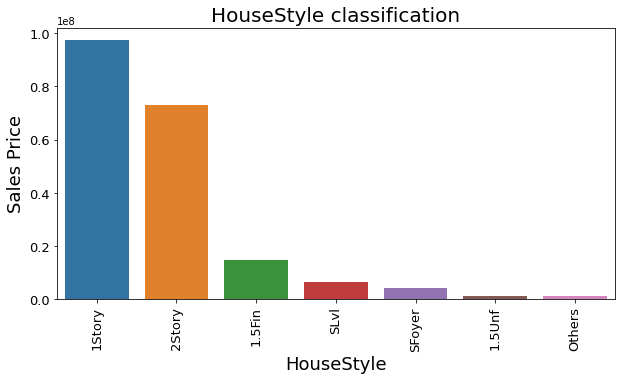

In [258]:
colName = 'HouseStyle'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('HouseStyle',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('HouseStyle classification',fontsize=20)
plt.show()

In [259]:
# Checking OverallCond columns
frq = df.OverallCond.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<2).dropna()
frq
df.OverallCond = df.OverallCond.replace(frq.index,'Others')  
df.OverallCond.value_counts()/df.shape[0]*100

5         59.857270
6         15.789474
7         11.864407
8          4.995540
4          3.835861
Others     3.657449
Name: OverallCond, dtype: float64

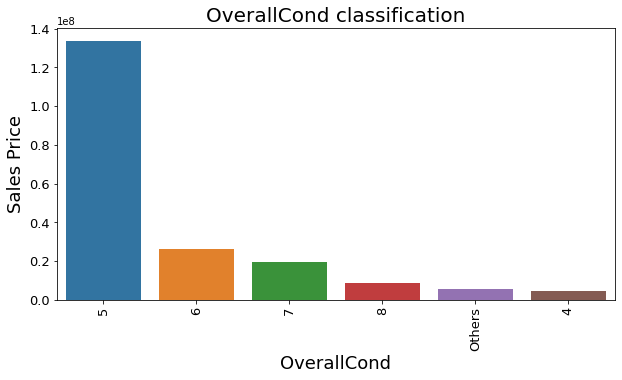

In [260]:
colName = 'OverallCond'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('OverallCond',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('OverallCond classification',fontsize=20)
plt.show()

In [261]:
# Checking RoofStyle columns
frq = df.RoofStyle.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<1).dropna()
frq
df.RoofStyle = df.RoofStyle.replace(frq.index,'Others')  
df.RoofStyle.value_counts()/df.shape[0]*100

Gable     80.553078
Hip       18.108831
Others     1.338091
Name: RoofStyle, dtype: float64

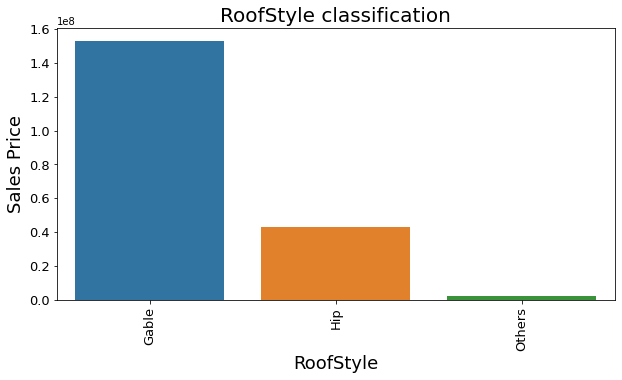

In [262]:
colName = 'RoofStyle'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('RoofStyle',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('RoofStyle classification',fontsize=20)
plt.show()

In [263]:
# Checking Exterior1st columns
frq = df.Exterior1st.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<0.15).dropna()
frq
df.Exterior1st = df.Exterior1st.replace(frq.index,'Others')  
df.Exterior1st.value_counts()/df.shape[0]*100

VinylSd    39.785905
MetalSd    15.165031
HdBoard    14.986619
Wd Sdng    11.864407
Plywood     5.976806
CemntBd     3.835861
BrkFace     2.943800
WdShing     1.962533
AsbShng     1.516503
Stucco      1.516503
Others      0.267618
BrkComm     0.178412
Name: Exterior1st, dtype: float64

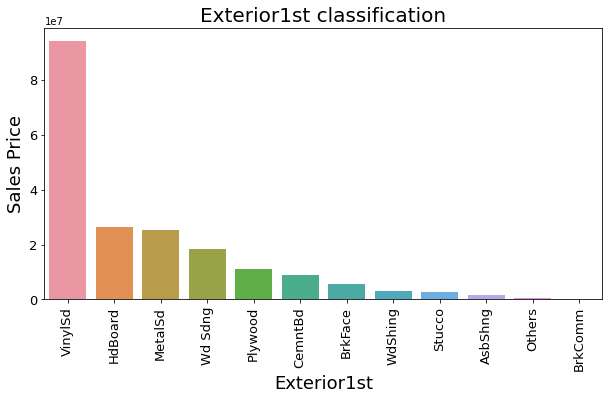

In [264]:
colName = 'Exterior1st'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Exterior1st',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('Exterior1st classification',fontsize=20)
plt.show()

In [265]:
# Checking MasVnrType columns
frq = df.MasVnrType.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<10).dropna()
frq
df.MasVnrType = df.MasVnrType.replace(frq.index,'Others')  
df.MasVnrType.value_counts()/df.shape[0]*100

None       58.251561
BrkFace    31.132917
Others     10.615522
Name: MasVnrType, dtype: float64

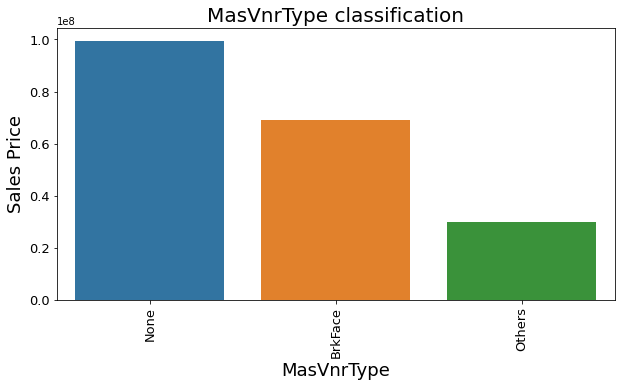

In [266]:
colName = 'MasVnrType'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('MasVnrType',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('MasVnrType classification',fontsize=20)
plt.show()

In [267]:
# Checking ExterQual columns ExterCond
frq = df.ExterQual.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<5).dropna()
frq
df.ExterQual = df.ExterQual.replace(frq.index,'Others')  
df.ExterQual.value_counts()/df.shape[0]*100

TA        60.392507
Gd        36.217663
Others     3.389831
Name: ExterQual, dtype: float64

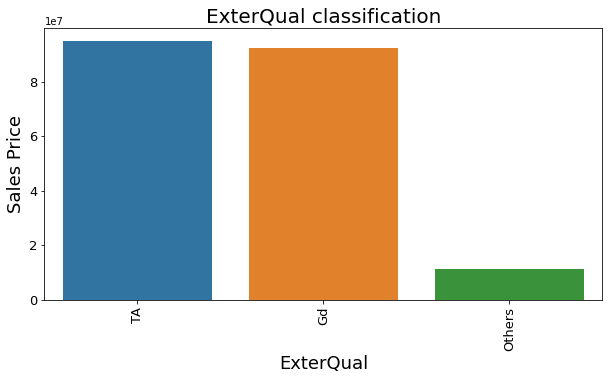

In [268]:
colName = 'ExterQual'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('ExterQual',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('ExterQual classification',fontsize=20)
plt.show()

In [269]:
# Checking ExterCond columns Foundation
frq = df.ExterCond.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<2).dropna()
frq
df.ExterCond = df.ExterCond.replace(frq.index,'Others')  
df.ExterCond.value_counts()/df.shape[0]*100

TA        88.403211
Gd         9.455843
Others     2.140946
Name: ExterCond, dtype: float64

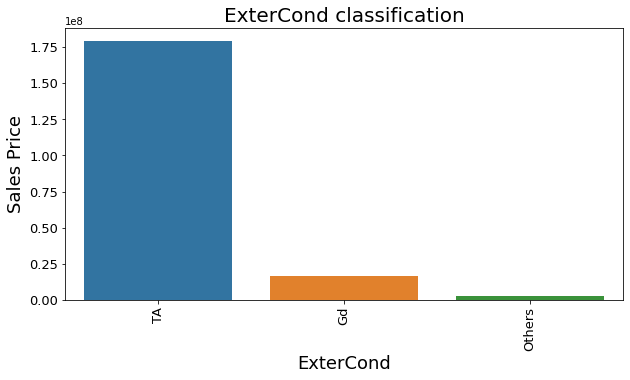

In [270]:
colName = 'ExterCond'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('ExterCond',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('ExterCond classification',fontsize=20)
plt.show()

In [271]:
# Checking Foundation columns 
frq = df.Foundation.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<2).dropna()
frq
df.Foundation = df.Foundation.replace(frq.index,'Others')  
df.Foundation.value_counts()/df.shape[0]*100

PConc     48.438894
CBlock    39.429081
BrkTil     9.812667
Others     2.319358
Name: Foundation, dtype: float64

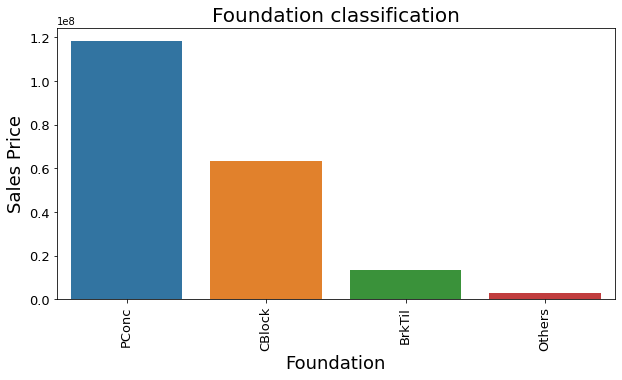

In [272]:
colName = 'Foundation'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Foundation',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('Foundation classification',fontsize=20)
plt.show()

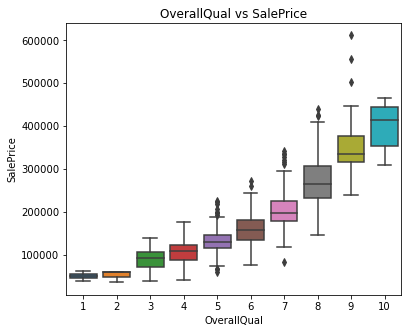

In [273]:
# Plotting the boxplot for OverallQual vs SalePrice
plt.figure(figsize=(6,5))
sns.boxplot(x="OverallQual", y="SalePrice", data=df)
plt.title("OverallQual vs SalePrice")
plt.show()

Observation: As OverallQual increases, the SalePrice also increases.

#### 5. Checking the target variable

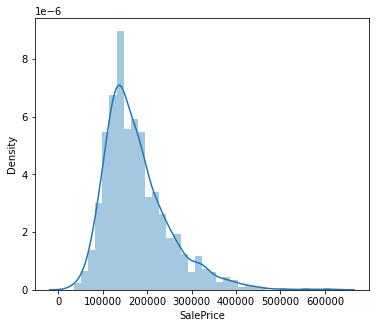

In [274]:
plt.figure(figsize=(6,5))
sns.distplot(df.SalePrice)
plt.show()

- Data is not normalized
- So, we are doing log transformation

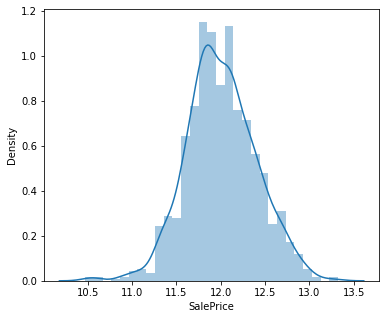

In [275]:
plt.figure(figsize=(6,5))
sns.distplot(np.log(df.SalePrice))
plt.show()

## Creating the dummy variables

In [276]:
# Taking all categorical variables
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Y,SBrkr,1,2,1,3,Gd,8,Typ,0,Attchd,RFn,2,TA,TA,Y,WD,Normal
1,20,RL,Reg,Lvl,Others,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,Y,SBrkr,0,2,0,3,TA,6,Typ,1,Attchd,RFn,2,TA,TA,Y,WD,Normal
2,60,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Y,SBrkr,1,2,1,3,Gd,6,Typ,1,Attchd,RFn,2,TA,TA,Y,WD,Normal
3,70,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Y,SBrkr,1,1,0,3,Gd,7,Typ,1,Detchd,Unf,3,TA,TA,Y,WD,Abnorml
4,60,RL,IR1,Lvl,Others,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,Y,SBrkr,1,2,1,4,Gd,9,Typ,1,Attchd,RFn,3,TA,TA,Y,WD,Normal


In [277]:
# convert into dummies
df_dummies = pd.get_dummies(df_cat, drop_first=True)
df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Inside,LotConfig_Others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Others,RoofStyle_Hip,RoofStyle_Others,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Others,ExterQual_Others,ExterQual_TA,ExterCond_Others,ExterCond_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0

In [278]:
# Drop categorical variables 
df=df.drop(list(df_cat.columns), axis=1)

In [279]:
# concat dummy variables with df
df = pd.concat([df, df_dummies], axis=1)
df.shape

(1121, 239)

## Splitting the data into Train and Test data set

In [280]:
#y = np.log(df.SalePrice)
#X = df.drop("SalePrice",1)

In [281]:
# split into train and test
#
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [282]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,train_size=0.7,
                                                    test_size = 0.3, random_state=100)


## Scalling the data sets

In [283]:
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[numerical_col] = scaler.fit_transform(df_train[numerical_col])
df_test[numerical_col] = scaler.transform(df_test[numerical_col])
X_train = df_train.drop('SalePrice',axis=1)
y_train = df_train.SalePrice
X_test = df_test.drop('SalePrice',axis=1)
y_test = df_test.SalePrice

## Linear Regression

In [284]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [285]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-10.099161684744569
[-1.03028896e-02  4.87422574e-02  4.72714525e-03  1.85159318e-03
 -1.91410542e-03  9.21836980e-02 -1.53349489e-02 -4.62498349e-03
  9.13003364e-02  1.53839471e-01  6.88967793e-02  1.84109999e-01
 -5.22890271e-04  1.90454076e-02  3.86460893e-02  2.13354528e-02
  1.69215606e-02  3.79973830e-14  5.36061998e-03 -9.28429673e-04
  9.93029202e-02  5.37378145e-02  2.87016665e-01 -1.94014806e-03
 -1.12686584e-03  1.19981904e-01  1.84240190e-01  1.97748734e-02
  2.77142698e-02 -1.50890049e-01 -2.15252510e-01 -4.24956083e-01
 -2.92185711e-01 -1.12131020e-02 -7.24945318e-02 -1.11839219e-01
  7.99512635e-02 -2.26441007e-02 -6.20362118e-02 -1.05725018e-01
 -6.97098874e-02 -5.89335552e-02 -7.23836467e-02  1.84331717e-14
  1.67647943e-01 -1.61885116e-02  1.67949001e-01  2.65577674e-03
  2.40773241e-01 -1.65992833e-01 -3.40780555e-02 -1.76881209e-01
 -3.91829295e-01 -1.20501970e-01 -7.31662771e-02  3.46460424e-01
 -2.79837109e-03  2.98641437e-01  1.52629193e-01 -1.60632589e-01
 -1.8

In [286]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr**0.5)
metric.append(mse_test_lr**0.5)

0.9514092395788053
0.9034033225631337
38.09515617021661
43.86185889183524
0.04859076042119466
0.36076846307851435


## Ridge Regression

In [287]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [288]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_['alpha'])

6.0


In [289]:
#Fitting Ridge model for alpha = 6 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.86381331e-03  5.15471918e-02  4.89391854e-03  3.17816104e-03
  6.34468701e-03  1.11050451e-01 -5.62349840e-03 -7.12101428e-03
  1.09243584e-01  1.47196156e-01  9.17304102e-02  1.99802333e-01
 -3.28509677e-04  2.63877447e-02  3.50180357e-02  2.83674630e-02
  1.50232045e-02  0.00000000e+00  5.29412788e-03  2.98992424e-03
  3.96892405e-02  2.45263349e-02  3.63386179e-02  1.67814936e-02
  4.27619227e-02  8.21209783e-02  2.01611852e-02 -2.27411952e-03
 -7.32003378e-03 -1.32603245e-01 -9.43145901e-03 -1.39068929e-01
 -7.17937772e-02 -4.92236480e-02 -3.13333064e-03 -6.95617144e-02
  2.02144975e-02 -3.05542517e-02  1.78621077e-02 -7.89918933e-02
 -1.05906405e-03 -2.51720729e-02 -1.26177940e-02  0.00000000e+00
  8.70907345e-02  5.59267511e-02  4.27088737e-02 -3.04184515e-02
  2.01846334e-01 -1.21729686e-01 -8.09661744e-02 -6.10897511e-02
 -2.13478270e-01 -1.49842089e-01 -7.89072727e-02  6.96859598e-02
 -3.16238213e-02  1.27611904e-01  1.00970873e-01 -9.51788735e-02
 -3.29915298e-02 -2.08309

In [290]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score (Train): ",end="")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score (Test): ",end="")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train): ",end="")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test): ",end="")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE (Train): ",end="")
print(mse_train_lr**0.5)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE (Test): ",end="")
print(mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

R2 score (Train): 0.9436861081806284
R2 score (Test): 0.9120916981829091
RSS (Train): 44.150091186387314
RSS (Test): 39.91670968436977
RMSE (Train): 0.2373054820676749
RMSE (Test): 0.34416160411339375


In [291]:
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=1000]
ridge_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005425,0.001279,0.002248,0.000383,0.0001,{'alpha': 0.0001},-0.255515,-0.296559,-0.252449,-0.220226,-0.230283,-0.251006,0.026360,26,-0.144712,-0.141608,-0.147787,-0.146149,-0.148868,-0.145825,0.002539
1,0.004887,0.000278,0.001871,0.000093,0.001,{'alpha': 0.001},-0.255308,-0.296024,-0.252187,-0.220178,-0.230275,-0.250794,0.026178,25,-0.144740,-0.141610,-0.147814,-0.146161,-0.148877,-0.145840,0.002543
2,0.005036,0.000495,0.001916,0.000075,0.01,{'alpha': 0.01},-0.253607,-0.291298,-0.250019,-0.219706,-0.230120,-0.248950,0.024601,24,-0.145019,-0.141747,-0.148072,-0.146281,-0.148969,-0.146018,0.002539
3,0.004981,0.000374,0.002083,0.000198,0.05,{'alpha': 0.05},-0.251383,-0.278740,-0.244851,-0.217818,-0.228806,-0.244320,0.020871,23,-0.145744,-0.142743,-0.148834,-0.146820,-0.149344,-0.146697,0.002372
4,0.005215,0.000298,0.002340,0.000346,0.1,{'alpha': 0.1},-0.249027,-0.271031,-0.240965,-0.216025,-0.227900,-0.240990,0.018770,22,-0.146348,-0.143684,-0.149381,-0.147550,-0.149778,-0.147348,0.002214
5,0.004918,0.000205,0.001845,0.000070,0.2,{'alpha': 0.2},-0.245096,-0.262836,-0.235628,-0.213407,-0.226454,-0.236684,0.016747,20,-0.147301,-0.144982,-0.150226,-0.148577,-0.150394,-0.148296,0.002009
6,0.004939,0.000407,0.002112,0.000535,0.3,{'alpha': 0.3},-0.242262,-0.257434,-0.232049,-0.211298,-0.225428,-0.233694,0.015554,19,-0.148095,-0.145937,-0.150954,-0.149392,-0.150942,-0.149064,0.001894
7,0.005016,0.000432,0.001988,0.000090,0.4,{'alpha': 0.4},-0.240085,-0.253339,-0.229260,-0.209518,-0.224672,-0.231375,0.014734,18,-0.148814,-0.146744,-0.151606,-0.150184,-0.151414,-0.149752,0.001806
8,0.004789,0.000202,0.002047,0.000556,0.5,{'alpha': 0.5},-0.238429,-0.250026,-0.226891,-0.207954,-0.224027,-0.229466,0.014156,16,-0.149419,-0.147471,-0.152187,-0.150857,-0.151854,-0.150358,0.001735
9,0.004649,0.000255,0.002067,0.000450,0.6,{'alpha': 0.6},-0.237144,-0.247243,-0.224848,-0.206635,-0.223480,-0.227870,0.013716,15,-0.149948,-0.148111,-0.152712,-0.151458,-0.152238,-0.150894,0.001677


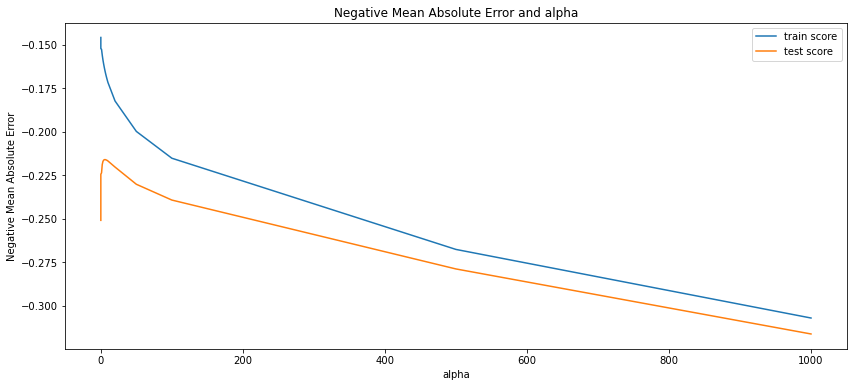

In [292]:
# plotting mean test and train scoes with alpha 
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')
plt.figure(figsize=(14,6))

# plotting
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

Observation:
- The above plot defines the way to decide the optimum value of alpha.
- The point in which train and test score has less gap between them is the value which we take as an optimum value of alpha
- From the above plot, we came to know that the value with alpha = 6 has a minimum gap between the test and the training score.
- From the above result, we can see the train data has 0.94 as its R2 value, on test data we have 0.91 as R2 value. So it is pretty much predicting well.
- We can say it hasn't overfitted because the test data(91% r2 value) comparable value when compared to train data(94% r2 value)

## Lasso Regression

In [293]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [294]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_['alpha'])

0.001


In [295]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [296]:
lasso.coef_

array([ 1.51597955e-03,  5.16572194e-02,  5.04558437e-03,  3.06479771e-03,
        0.00000000e+00,  1.10936491e-01,  0.00000000e+00, -0.00000000e+00,
        9.51171670e-02,  4.57696781e-02,  0.00000000e+00,  3.16441823e-01,
       -1.75613026e-04,  2.47674154e-02,  3.08070643e-02,  2.73547164e-02,
        8.97181435e-03,  0.00000000e+00,  4.19857267e-03,  4.29823431e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        4.85154693e-02,  1.95224784e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -2.35038817e-01, -0.00000000e+00, -1.15283989e-01,
       -0.00000000e+00, -4.01026526e-02,  0.00000000e+00, -3.82060479e-02,
        0.00000000e+00, -2.63051665e-02, -0.00000000e+00, -2.30631792e-02,
        0.00000000e+00, -1.30868054e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  9.49389682e-02,  0.00000000e+00,  0.00000000e+00,
        2.95392426e-01, -8.88103174e-02, -4.11305597e-02, -6.18488778e-03,
       -3.60341173e-01, -

In [297]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score (Train): ",end="")
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score (Test): ",end="")
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train): ",end="")
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test): ",end="")
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE (Train): ",end="")
print(mse_train_lr**0.5)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE (Test): ",end="")
print(mse_test_lr**0.5)
metric3.append(mse_test_lr**0.5)

R2 score (Train): 0.942149248744929
R2 score (Test): 0.9132412398146412
RSS (Train): 45.35498898397566
RSS (Test): 39.394734869301445
RMSE (Train): 0.24052183114027506
RMSE (Test): 0.34190396759076513


In [298]:
# cv results
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.096550,0.029120,0.002201,0.000148,0.0001,{'alpha': 0.0001},-0.240837,-0.257267,-0.233713,-0.213461,-0.220331,-0.233122,0.015447,2,-0.147270,-0.146160,-0.151210,-0.149259,-0.150514,-0.148882,0.001910
1,0.035492,0.001493,0.001869,0.000171,0.001,{'alpha': 0.001},-0.226983,-0.222422,-0.206186,-0.196132,-0.207142,-0.211773,0.011332,1,-0.161977,-0.164095,-0.169127,-0.164192,-0.166414,-0.165161,0.002430
2,0.008362,0.001060,0.002237,0.000483,0.01,{'alpha': 0.01},-0.287841,-0.267461,-0.217516,-0.257188,-0.229613,-0.251924,0.025459,3,-0.225542,-0.227763,-0.237776,-0.234274,-0.230146,-0.231100,0.004418
3,0.004444,0.000248,0.001763,0.000129,0.05,{'alpha': 0.05},-0.337956,-0.319396,-0.272916,-0.321936,-0.287187,-0.307878,0.024023,4,-0.294905,-0.299030,-0.313186,-0.297926,-0.300786,-0.301167,0.006307
4,0.004022,0.000041,0.001751,0.000071,0.1,{'alpha': 0.1},-0.348160,-0.336366,-0.293277,-0.345418,-0.301592,-0.324963,0.022964,5,-0.312659,-0.317373,-0.331464,-0.318918,-0.318252,-0.319733,0.006262
5,0.004476,0.000390,0.001939,0.000194,0.2,{'alpha': 0.2},-0.383017,-0.397574,-0.362553,-0.415061,-0.351247,-0.381890,0.023067,6,-0.368576,-0.373109,-0.383168,-0.378825,-0.376903,-0.376116,0.004972
6,0.003994,0.000220,0.002034,0.000405,0.3,{'alpha': 0.3},-0.431849,-0.450800,-0.427172,-0.488448,-0.411158,-0.441885,0.026491,7,-0.431857,-0.428600,-0.439084,-0.445312,-0.439792,-0.436929,0.005970
7,0.003829,0.000248,0.001884,0.000231,0.4,{'alpha': 0.4},-0.484095,-0.495608,-0.473601,-0.561275,-0.457515,-0.494419,0.035701,8,-0.488667,-0.477961,-0.489488,-0.509018,-0.492693,-0.491565,0.010037
8,0.003764,0.000183,0.001721,0.000134,0.5,{'alpha': 0.5},-0.539894,-0.547846,-0.527174,-0.607203,-0.508176,-0.546059,0.033381,9,-0.543444,-0.533194,-0.547237,-0.546973,-0.549460,-0.544061,0.005765
9,0.003737,0.000119,0.001765,0.000078,0.6,{'alpha': 0.6},-0.560641,-0.572877,-0.547833,-0.607498,-0.529783,-0.563726,0.026130,14,-0.565101,-0.558565,-0.569679,-0.546651,-0.572868,-0.562573,0.009300


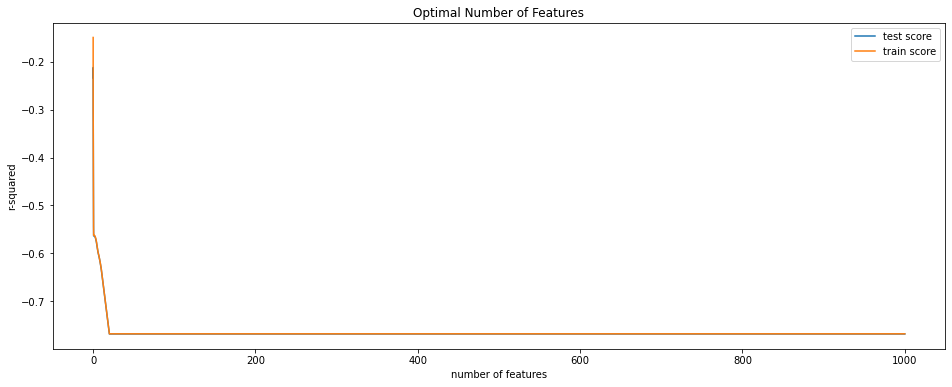

In [299]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(lasso_results["param_alpha"], lasso_results["mean_test_score"])
plt.plot(lasso_results["param_alpha"], lasso_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')
plt.show()

Observation
- The above plot defines the way to decide the optimum value of alpha.
- The point in which train and test score has less gap between them is the value which we take as an optimum value of alpha
- From the above plot, we came to know that the value with alpha = 0.001 has a minimum gap between the test and the training score.
- From the above result, we can see the train data has 0.94 as its R2 value, on test data we have 0.91 as R2 value. So it is pretty much predicting well.
- We can say it hasn't overfitted because the test data(91% r2 value) comparable value when compared to train data(94% r2 value)

## Final table comparing all the 3 regression techniques

In [300]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis=1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.951409,0.943686,0.942149
1,R2 Score (Test),0.903403,0.912092,0.913241
2,RSS (Train),38.095156,44.150091,45.354989
3,RSS (Test),43.861859,39.916710,39.394735
4,RMSE (Train),0.220433,0.237305,0.240522
5,RMSE (Test),0.360768,0.344162,0.341904


__Conclusion__
- From the above two techniques of Lasso and Ridge Regression, we can say that both almost having the same r2 value.
- When comparing the complexity, it is better to use Lasso because as we have 238 variables, Lasso will make the feature selection among the present variables, but Ridge will not reduce columns, it will keep all 238 variables with the reducing the coefficient of variables.

In [301]:
X_train.shape

(784, 238)

## Lets observe the changes in the coefficients after regularization

In [302]:
betas = pd.DataFrame(index=X_train.columns)

In [303]:
betas.rows = X_train.columns

In [304]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [305]:
pd.set_option('display.max_rows', None)
betas.head(50)

,Linear,Ridge,Lasso
LotFrontage,-1.030289e-02,0.003864,0.001516
LotArea,4.874226e-02,0.051547,0.051657
YearBuilt,4.727145e-03,0.004894,0.005046
YearRemodAdd,1.851593e-03,0.003178,0.003065
MasVnrArea,-1.914105e-03,0.006345,0.000000
BsmtFinSF1,9.218370e-02,0.111050,0.110936
BsmtFinSF2,-1.533495e-02,-0.005623,0.000000
BsmtUnfSF,-4.624983e-03,-0.007121,-0.000000
TotalBsmtSF,9.130034e-02,0.109244,0.095117
1stFlrSF,1.538395e-01,0.147196,0.045770


## Top 20 features from RIDGE regressoin

In [306]:
betas.Ridge.sort_values(ascending=False).head(20)

OverallQual_9           0.396373
Neighborhood_StoneBr    0.241002
Neighborhood_Crawfor    0.201846
BsmtExposure_Gd         0.200227
GrLivArea               0.199802
OverallQual_10          0.195361
Functional_Typ          0.164515
OverallCond_8           0.151896
1stFlrSF                0.147196
FullBath_3              0.144334
Condition1_Norm         0.144000
Exterior2nd_CmentBd     0.143579
OverallCond_7           0.138211
GarageCars_3            0.131258
SaleType_CWD            0.129007
Neighborhood_NoRidge    0.127612
OverallQual_8           0.125554
GarageType_BuiltIn      0.121918
BsmtCond_TA             0.120797
Neighborhood_Somerst    0.120262
Name: Ridge, dtype: float64

## Top 20 features from LASSO regressoin

In [307]:
betas.Lasso.sort_values(ascending=False).head(20)

OverallQual_9            0.760249
OverallQual_10           0.623637
GrLivArea                0.316442
OverallQual_8            0.313825
Neighborhood_StoneBr     0.311909
Neighborhood_Crawfor     0.295392
BsmtExposure_Gd          0.212792
Functional_Typ           0.208379
Exterior2nd_CmentBd      0.203347
SaleCondition_Partial    0.187300
OverallCond_8            0.184837
GarageCars_3             0.181924
Neighborhood_NoRidge     0.181913
FullBath_3               0.173295
OverallCond_7            0.151003
Neighborhood_Somerst     0.138225
Condition1_Norm          0.116616
Exterior1st_BrkFace      0.115419
BsmtCond_TA              0.114375
BsmtFinSF1               0.110936
Name: Lasso, dtype: float64

## Conclusion:
### - From the above two techniques of Lasso and Ridge Regression, we can say that both almost having the same r2 value.
### - When comparing the complexity, it is better to use Lasso because as we have 238 variables, Lasso will make the feature selection among the present variables, but Ridge will not reduce columns, it will keep all 238 variables with the reducing the coefficient of variables.

## Subjective Questions Answer

__Question 1__

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

__Answer__


In [308]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [309]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_['alpha']*2)
#Fitting Ridge model for alpha = 14 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score (Train): ",end="")
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score (Test): ",end="")
print(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train): ",end="")
print(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test): ",end="")
print(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE (Train): ",end="")
print(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE (Test): ",end="")
print(mse_test_lr**0.5)

12.0
R2 score (Train): 0.9387009454584497
R2 score (Test): 0.9109831575244767
RSS (Train): 48.0584587605754
RSS (Test): 40.42006710023746
RMSE (Train): 0.24758645872008075
RMSE (Test): 0.3463247781050152


In [310]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [311]:
alpha =model_cv.best_params_['alpha']*2

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [312]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score (Train): ",end="")
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score (Test): ",end="")
print(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train): ",end="")
print(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test): ",end="")
print(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE (Train): ",end="")
print(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE (Test): ",end="")
print(mse_test_lr**0.5)

R2 score (Train): 0.9353634972218796
R2 score (Test): 0.9123782463599925
RSS (Train): 50.675018178046386
RSS (Test): 39.78659614379629
RMSE (Train): 0.2542370995313634
RMSE (Test): 0.34360022723173245


In [313]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_


In [314]:
print('Top 10 Ridge Variables after doubling alpha')
betas.Ridge.sort_values(ascending=False).head(20).index

Top 10 Ridge Variables after doubling alpha


Index(['OverallQual_9', 'GrLivArea', 'Neighborhood_StoneBr',
       'Neighborhood_Crawfor', 'BsmtExposure_Gd', 'Functional_Typ', '1stFlrSF',
       'GarageCars_3', 'Condition1_Norm', 'OverallQual_10', 'OverallCond_8',
       'OverallQual_8', 'BsmtFinSF1', 'TotalBsmtSF', 'OverallCond_7',
       'Exterior2nd_CmentBd', 'FullBath_3', 'Neighborhood_Somerst',
       'Neighborhood_NridgHt', '2ndFlrSF'],
      dtype='object')

In [315]:
print('Top 10 Lasso Variables after doubling alpha')
betas.Lasso.sort_values(ascending=False).head(20).index

Top 10 Lasso Variables after doubling alpha


Index(['OverallQual_9', 'OverallQual_10', 'GrLivArea', 'OverallQual_8',
       'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'Functional_Typ',
       'BsmtExposure_Gd', 'GarageCars_3', 'SaleCondition_Partial',
       'OverallCond_8', 'Exterior2nd_CmentBd', 'OverallCond_7',
       'Neighborhood_Somerst', 'BsmtFinSF1', 'Condition1_Norm',
       'Exterior1st_BrkFace', 'Neighborhood_BrkSide', 'TotalBsmtSF',
       'OverallCond_6'],
      dtype='object')

- The optimal value of alpha for ridge and lasso regression are 7.0 and 0.001 respectively.
- After doubling the alpha for both regression the R2 value decreases. As shown below
        - Old R2 value for Ridge:
            - R2 score (Train): 0.943686
            - R2 score (Test): 0.903403
        - Old R2 value for Lasso:
            - R2 score (Train): 0.942149
            - R2 score (Test): 0.912092
        - New R2 value for Ridge:
            - R2 score (Train): 0.9387009454584497
            - R2 score (Test): 0.9109831575244767
        - New R2 value for Lasso:
            - R2 score (Train): 0.9353634972218796
            - R2 score (Test): 0.9123782463599925
- Most important predictor variable (Ridge): 
       'OverallQual_9', 'GrLivArea', 'Neighborhood_StoneBr',
       'Neighborhood_Crawfor', 'BsmtExposure_Gd', 'Functional_Typ', '1stFlrSF',
       'GarageCars_3', 'Condition1_Norm', 'OverallQual_10', 'OverallCond_8',
       'OverallQual_8', 'BsmtFinSF1', 'TotalBsmtSF', 'OverallCond_7',
       'Exterior2nd_CmentBd', 'FullBath_3', 'Neighborhood_Somerst',
       'Neighborhood_NridgHt', '2ndFlrSF'
- Most important predictor variable (Lasso): 
       'OverallQual_9', 'OverallQual_10', 'GrLivArea', 'OverallQual_8',
       'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'Functional_Typ',
       'BsmtExposure_Gd', 'GarageCars_3', 'SaleCondition_Partial',
       'OverallCond_8', 'Exterior2nd_CmentBd', 'OverallCond_7',
       'Neighborhood_Somerst', 'BsmtFinSF1', 'Condition1_Norm',
       'Exterior1st_BrkFace', 'Neighborhood_BrkSide', 'TotalBsmtSF',
       'OverallCond_6'

__Question 2__

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

__Answer__

In [316]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.951409,0.943686,0.942149
1,R2 Score (Test),0.903403,0.912092,0.913241
2,RSS (Train),38.095156,44.150091,45.354989
3,RSS (Test),43.861859,39.916710,39.394735
4,RMSE (Train),0.220433,0.237305,0.240522
5,RMSE (Test),0.360768,0.344162,0.341904


- From the above two techniques of Lasso and Ridge Regression, we can say that both almost having the same r2 value.
- When comparing the complexity, it is better to use Lasso because as we have 238 variables, Lasso will make the feature selection among the present variables, but Ridge will not reduce columns, it will keep all 238 variables with the reducing the coefficient of variables.

So, will use the Lasso Regression model as the final model.

__Question 3__

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

__Answer__

Top 5 variables in the current model:
- OverallQual_9           
- OverallQual_10     
- GrLivArea            
- OverallQual_8           
- Neighborhood_StoneBr  

In [317]:
top5=['OverallQual_9','OverallQual_10','GrLivArea','OverallQual_8','Neighborhood_StoneBr']
### dropping top 5 variables from lasso model
df_train = df_train.drop(top5,axis=1)
df_test = df_test.drop(top5,axis=1)

In [318]:
X_train = df_train.drop('SalePrice',axis=1)
y_train = df_train.SalePrice
X_test = df_test.drop('SalePrice',axis=1)
y_test = df_test.SalePrice

In [319]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [320]:
alpha =model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score (Train): ",end="")
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score (Test): ",end="")
print(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train): ",end="")
print(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test): ",end="")
print(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE (Train): ",end="")
print(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE (Test): ",end="")
print(mse_test_lr**0.5)

R2 score (Train): 0.9383076861937636
R2 score (Test): 0.9008277605289943
RSS (Train): 48.366774024089324
RSS (Test): 45.03134982574883
RMSE (Train): 0.2483793747601366
RMSE (Test): 0.3655464176533472


In [321]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_

In [322]:
betas.Lasso.sort_values(ascending=False).head(5)

1stFlrSF                0.311842
2ndFlrSF                0.292282
Neighborhood_Crawfor    0.288673
Exterior2nd_CmentBd     0.273259
SaleType_CWD            0.245487
Name: Lasso, dtype: float64

__The five most important predictor variables after removing the top 5 variable from final model are:__
- 1stFlrSF               
- 2ndFlrSF                
- Neighborhood_Crawfor 
- Exterior2nd_CmentBd
- SaleType_CWD      

__Question 4__

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

__Answer__

While creating the best model for any problem statement, we end up choosing from a set
of models that would give us the least test error. Hence, the test error, and not only the training
error, needs to be estimated in order to select the best model. 


This can be done in the following two
ways:
- Use metrics that take into account both the model fit and its simplicity. They penalise the model for
being too complex (i.e., for overfitting) and, consequently, more representative of the unseen ‘test
error’. Some examples of such metrics are adjusted R2, AIC and BIC.
- Estimate the test error via a validation set or a cross-validation approach.
In the validation set approach, we find the test error by training the model on a training set and
fitting on an unseen validation set, while the in n-fold cross-validation approach, we take the mean
of errors generated by training the model on all folds except the kth fold and testing the model on
the kth fold, where k varies from 1 to n.

So far, you have understood that MSE of the training might not be a good estimate of the test error.
The aforementioned parameters are a manipulation of the RSS (residual sum of squares), wherein
a penalty term is introduced to compensate for the increase in complexity due to the increase in the
number of predictors.